In [ ]:
"""
This file imports and processes the data. 
Data is downloaded in two parts - training & test sets. 

The column names are inputted. 
Categorical variables are one-hot-encoded. 
The data is combined and re-split 80/20. 
Undersampling is performed to balance the data. 

An exploratory data analysis is performed which looks at the correlations between all features, as well as those with the target. 
"""

In [6]:
import numpy as np
import pandas as pd
pd.options.display.max_columns=None
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils import shuffle
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import copy 

In [7]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [58]:
def import_data(train_path='adult.data', test_path='adult_test.test'):
    train = pd.read_csv(train_path, sep=",", header=None)
    test = pd.read_csv(test_path, sep=",", header=None, error_bad_lines=True )
    
    print(color.BOLD + 'Import Data: '+ color.GREEN+ 'Complete' + color.END)
    print('Train shape: ', train.shape, '\n' 
     'Test shape: ', test.shape, '\n' 
     'Columns: ', train.columns.tolist(), '\n')
    
    return train, test 

In [70]:
def process_and_split_data(train, test):
    test[14]=test[14].apply(lambda x: x.replace('.', "")) 
    
    # Concatenate, Rename columns, drop repeated column 'education', & get dummies from categorical features
    data=pd.concat([train, test], axis=0)
    data.columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                  'hours', 'native', 'income']
    data.drop('education', axis=1, inplace=True)
    data=pd.get_dummies(data, drop_first=True)
    
    #Split back up into test and train
    X=data.iloc[:, :-1]
    y=data.iloc[:, -1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)
    
    print(color.BOLD + 'Process and Split Data: ' + color.GREEN+ 'Complete' + color.END, '\n')
    
    return X_train, X_test, y_train, y_test

In [60]:
def undersample_data(X_train, y_train):
    # Undersample data
    undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=42)
    X_train, y_train = undersampler.fit_resample(X_train, y_train)
    
    print(color.BOLD + 'Undersample data: ' + color.GREEN+ 'Complete' + color.END+ color.END)
    
    return X_train, y_train

In [73]:
def load_training_test_sets():
    train, test= import_data()
    X_train, X_test, y_train, y_test=process_and_split_data(train, test)
    #X_train, X_test, y_train, y_test= split_data(train, test)
    X_train, y_train= undersample_data(X_train, y_train)
    
    print('Balanced train data: ', X_train.shape, )
    print('Imbalanced test data: ', X_test.shape, '\n')
    
    return X_train, X_test, y_train, y_test

In [13]:
def data_exploration(X_train, X_test, y_train, y_test, show_all_correlations=False, show_significant_correlations=True, cutoff_corr_magnitude=0.2):
    
    # Combine train & test sizes
    df_train=pd.concat([X_train, y_train], axis=1)
    df_test=pd.concat([X_test, y_test], axis=1)
    df=pd.concat([df_train, df_test], axis=0)
    
    if show_all_correlations==True | show_significant_correlations==True:
        print(color.BOLD + 'Data Exploration: ' + color.GREEN+ 'Complete' + color.END + color.END, '\n')
    
    # Calculate correlation matrix
    if show_significant_correlations==True:
        
        fig, ax = plt.subplots()
        fig.set_size_inches(13, 1)

        corr=df.corr()
        mask=np.triu(corr)

        cc=corr.iloc[-1, :-2][abs(corr.iloc[-1])>cutoff_corr_magnitude].index.tolist()
        sns.heatmap(corr.loc['income_ >50K':, cc], cmap="PiYG", ax=ax, annot=True, fmt='.1f', vmin=-1, vmax=1, cbar=True,  annot_kws={"fontsize":8})
        ax.set_title('Selected Correlations between Features & Target, abs(corr)>{}'.format(cutoff_corr_magnitude))
        
    if show_all_correlations==True:
        fig, ax = plt.subplots()
        fig.set_size_inches(25, 25)

        corr=df.corr()
        mask=np.triu(corr)
        sns.heatmap(corr, cmap="PiYG", ax=ax, annot=False, fmt='.1f', vmin=-1, vmax=1, cbar=True,  mask=mask, annot_kws={"fontsize":8})
        ax.set_title('All Correlations between Features & Target')

In [75]:
# Load Training & Testing Sets
X_train_1, X_test_1, y_train_1, y_test_1= load_training_test_sets()

Import Data: Complete
Train shape:  (32561, 15) 
Test shape:  (16281, 15) 
Columns:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14] 

Process and Split Data: Complete 

Undersample data: Complete
Balanced train data:  (18664, 85)
Imbalanced test data:  (9769, 85) 



Data Exploration: Complete 




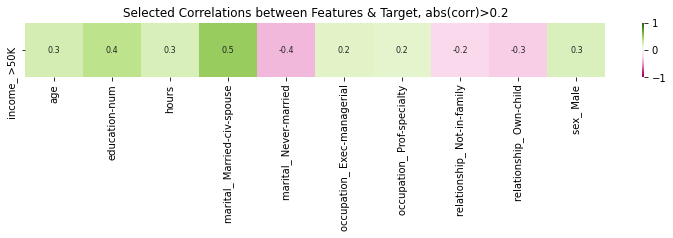

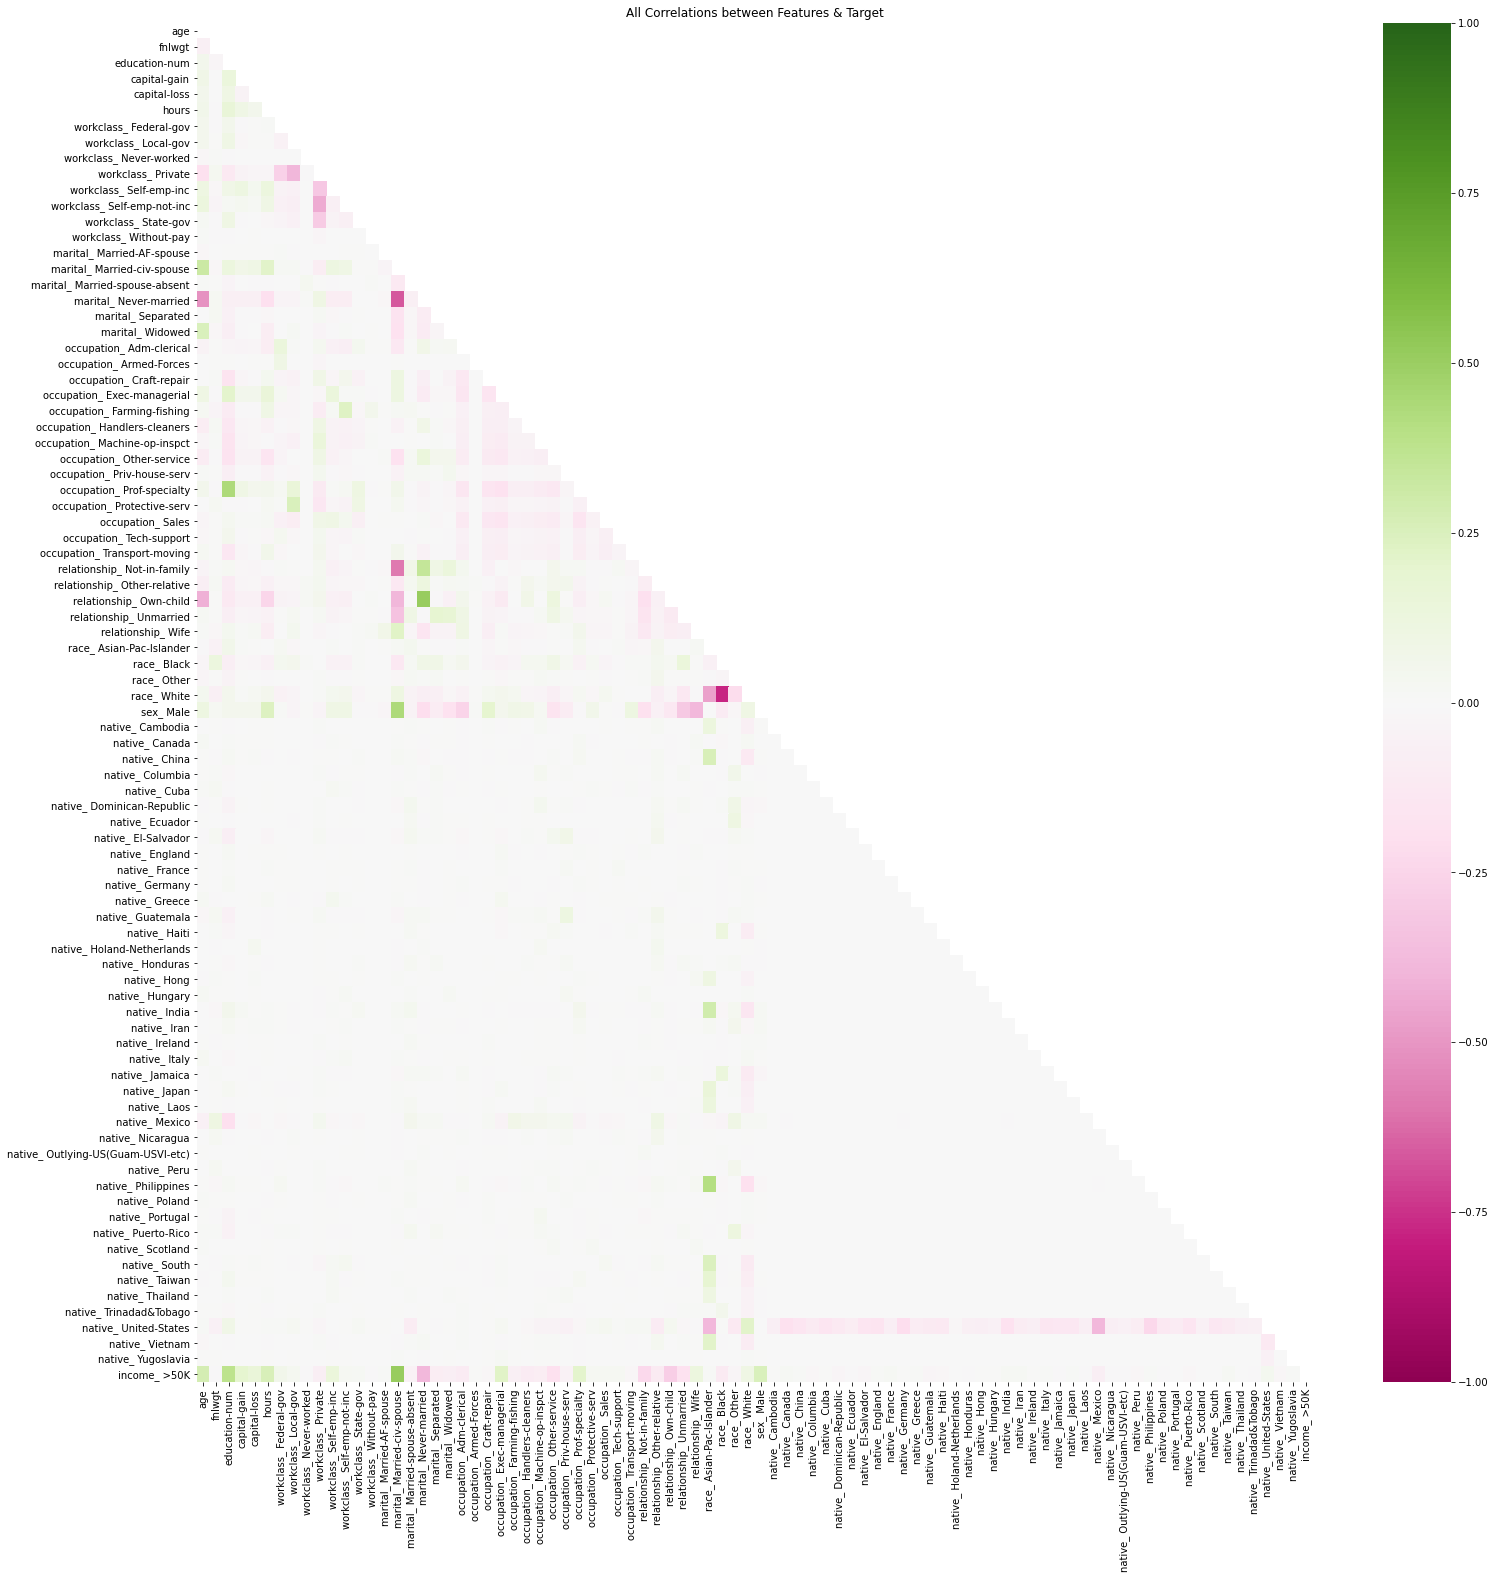

In [131]:
# Data Exploration
data_exploration(X_train, X_test, y_train, y_test, show_all_correlations=True )